In [1]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

Exercise 1a)

In [2]:
# For calulcating norm:
def norm(vector):
    result=0
    for xi in vector:
        result += xi**2

    result = np.sqrt(result)
    return result

In [3]:
# A matrix formation from previous lab:
def CreateMatrix(n):


    x = np.linspace(0,1,n)

    A = []
    for i in range(len(x)):
        if i == 0:
            row = np.zeros(len(x))
            row[0] = 2
            row[1] = -1
        elif i == len(x)-1:
            row = np.zeros(len(x))
            row[-1] = 2
            row[-2] = -1
        else:
            row = np.zeros(len(x))
            row[i-1] = -1
            row[i] = 2
            row[i+1] = -1

        A.append(row)

    #Only modification, that I convert lists to np.arrays()
    A = np.asanyarray(A)
    A = (n+1)**2*A
    return A



# n and A as given in the exercise:
n=10
A = CreateMatrix(n)





In [4]:
# For Exercise 1a) I have implemented 2 version of qr factorization.
# qr1(), is an implementation based on the stopping criteria mentioned
# in the lab notes. For that, the results werent close enough to the original,
# so I have impleneted one, where the stopping is based on iteration.

def qr1(A,mu,tolerance=0.00001):

    # Generating current Qk and Rk as given in the lab4 notes:
    Q,R = np.linalg.qr(np.subtract(A,mu*np.eye(A.shape[0])))

    # Updating Ak:
    Ak_1 = np.add(R @ Q, mu*np.eye(A.shape[0]))

    # Gets all off diagonal(under the main diagonal) into diag
    diag = np.diag(Ak_1,k=-1)

    # if all of diag's elements are in a tolerance range of 0, we have a solution:
    if abs(diag.all()) < tolerance:
       return np.diag(Ak_1)

    # else, we continue our iteration with updated mu, and A.
    else:
        return qr1(Ak_1,A.item(n-1, n-1),tolerance)

def qr2(A,mu,iter=2000):
    # If we have enough iterations, we return with our solution.
    if iter ==0:
        return np.diag(A)

    # Generating current Qk and Rk as given in the lab4 notes:
    Q,R = np.linalg.qr(np.subtract(A,mu*np.eye(A.shape[0])))


    # Updating Ak:
    Ak_1 = np.add(R @ Q, mu*np.eye(A.shape[0]))

    # Gets all off diagonal(under the main diagonal) into diag
    diag = np.diag(Ak_1,k=-1)

    # if iter != 0, we iterate again.
    return qr2(Ak_1,A.item(n-1, n-1),iter-1)

# Calculated eigenvelues are stored in the following arrays(calculated with 2 methods):
result_qr1 = qr1(A,A.item(n-1, n-1))
result_qr2 = qr2(A,A.item(n-1, n-1))

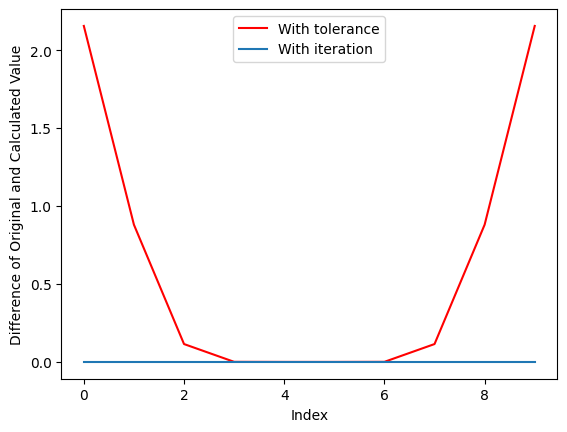

In [5]:
# Sort them in order:
result_qr1 = np.sort(result_qr1)
result_qr2 = np.sort(result_qr2)

# Initialize list, where we are going to store the differences between
# Original and calculated eigenvalues.
diff_qr1 = []
diff_qr2 = []

for k in range(1,n+1):
    # Original eigenvalues, given by formula in lab notes:
    lambda_k = (4*(n+1)**2)*np.sin(k*np.pi/(2*(n+1)))**2

    #Differences:
    diff_qr1.append(abs(lambda_k-result_qr1[k-1]))
    diff_qr2.append(abs(lambda_k-result_qr2[k-1]))
    #print(f"Error rate for {k}.eigenvalue: ")
    #print(diff[-1])
    #print("")

plt.plot(diff_qr1, color='red', label='With tolerance')
plt.plot(diff_qr2, label='With iteration')

plt.xlabel('Index')
plt.ylabel('Difference of Original and Calculated Value')
plt.legend()

plt.show()

Exercise 1b)

LU Decomposition for solving Ax =b

In [6]:
# This code part is from the following article:
# https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html
# LU Calculation was implemented from here, the rest is written by me.
def lu(A):

    #Get the number of rows
    size = A.shape[0]

    U = A.copy()
    L = np.eye(n, dtype=np.double)

    #Loop over rows
    for i in range(size):

        #Eliminate entries below i with row operations
        #on U and reverse the row operations to
        #manipulate L
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]

    return L, U

def forward_substitution(L, b):

    #Get number of rows
    n = L.shape[0]

    #Allocating space for the solution vector
    y = np.zeros_like(b, dtype=np.double);

    #Here we perform the forward-substitution.
    #Initializing  with the first row.
    y[0] = b[0] / L[0, 0]

    #Looping over rows in reverse (from the bottom  up),
    #starting with the second to last row, because  the
    #last row solve was completed in the last step.
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]

    return y

def back_substitution(U, y):

    #Number of rows
    n = U.shape[0]

    #Allocating space for the solution vector
    x = np.zeros_like(y, dtype=np.double);

    #Here we perform the back-substitution.
    #Initializing with the last row.
    x[-1] = y[-1] / U[-1, -1]

    #Looping over rows in reverse (from the bottom up),
    #starting with the second to last row, because the
    #last row solve was completed in the last step.
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]

    return x

def lu_solve(A, b):

    L, U = lu(A)

    y = forward_substitution(L, b)

    return back_substitution(U, y)

In [7]:
# This is the update process written in lab4 notes:
def Solve(A, theta,v):
    I = np.identity(A.shape[0])

    w = lu_solve(A-theta*I, v)
    return w

def update(w):
    return w/norm(w)

In [8]:
# This is where I call the Solve() function, to Solve 1b)
iteration = 1000
theta = result_qr2[0]
v0 = np.array([1,1,1,1,1,1,1,1,1,1])
v = v0/norm(v0)

for i in range(iteration):
    wk = Solve(A,theta,v)
    v = update(wk)

print(v)


[0.12013117 0.23053002 0.3222527  0.38786839 0.42206128 0.42206128
 0.38786839 0.3222527  0.23053002 0.12013117]


In [9]:
original = []

for i in range(1,n+1):
    original.append(np.sin((np.pi*i)/(n+1)))

# Normalising the formula's results:
original_norm = original/norm(original)


print("This is the calculated result:")
print(v)
print("")
print("This is the result from the fomrula:")
print(original_norm)

This is the calculated result:
[0.12013117 0.23053002 0.3222527  0.38786839 0.42206128 0.42206128
 0.38786839 0.3222527  0.23053002 0.12013117]

This is the result from the fomrula:
[0.12013117 0.23053002 0.3222527  0.38786839 0.42206128 0.42206128
 0.38786839 0.3222527  0.23053002 0.12013117]


The method converges quickly, there is no real difference between original and calculated eigenvector, given that we have chosen a pretty bad first estimate, for the eigenvector(all 1's normed).

$$
\lim_{{n \to \infty}}\lambda_k = \lim_{{n \to \infty}} {4(n + 1)^2 \sin^2\left(\frac{k\pi}{2(n + 1)}\right)} =\lim_{{n \to \infty}} \frac{\sin^2\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{1}{4(n + 1)^2 }} = \lim_{{n \to \infty}} k^2\pi^2\frac{\sin\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{k\pi}{2(n+1)}}\frac{\sin\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{k\pi}{2(n+1)}} =k^2\pi^2  \lim_{{n \to \infty}} \frac{\sin\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{k\pi}{2(n+1)}}\frac{\sin\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{k\pi}{2(n+1)}} $$


From a formual we know that:

$$\lim_{{x \to \infty}} \frac{\sin(x)}{x} = 0
$$

$$\lim_{{x \to 0}} \frac{\sin(x)}{x} = 1$$


As our 'x' is in the denominator  our limit is one for,


$$\lim_{{n \to \infty}} \frac{\sin\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{k\pi}{2(n+1)}} = 1$$

This gives us:
$$k^2\pi^2  \lim_{{n \to \infty}} \frac{\sin\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{k\pi}{2(n+1)}}\frac{\sin\left(\frac{k\pi}{2(n + 1)}\right)}{\frac{k\pi}{2(n+1)}}=k^2\cdot\pi^2\cdot1\cdot1 = k^2\cdot\pi^2$$